**Algorithms used:**

1. Random Forest

2. Decision Tree

3. Logistic Regression

4. Support Vector Machine

5. Extreme Gradient Boost

6. Naive Bayes Classifier


In [1]:
#Importing libraries for visualisation
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
#Reading dataset
df_train=pd.read_csv('Training Data.csv')
#Displaying top 5 rows of a dataset
df_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
#printing number of rows and columns in a dataset
rows, cols = df_train.shape
print("There are ", rows, "rows and ", cols, "columns present in the training dataset.")

There are  252000 rows and  13 columns present in the training dataset.
There are  28000 rows and  12 columns present in the testing dataset.


In [4]:
#Displaying the columns and their data types 
df_train.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

In [5]:
#Checking for Null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
#Checking for Duplicates
df_train.duplicated().sum()

0

In [7]:
#Displaying the Statistical Summary of the dataset
df_train.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
#dropping unuseful columns as it consists of unique values
df_train.drop(columns=['Id'],inplace=True,axis=1)

# **Exploratory Data Analysis**

**Univariate Analysis**

In [9]:
#Analysing Target Variable
lis=['No default','Default']
tar_var = df_train["risk_flag"].value_counts().tolist()
val = [tar_var[0], tar_var[1]]
fig = px.pie(values=df_train['risk_flag'].value_counts(), 
             names=lis , width=800, height=400, color_discrete_sequence=["orange","green"]
             ,title="Distribution of Target Varaible")
fig.show()

In [10]:
df_train.risk_flag.value_counts(normalize = True)
#1 shows defaulter and 0 shows non-default
#Imabalanced dataset

0    0.877
1    0.123
Name: risk_flag, dtype: float64

**Analysing Numerical columns**

In [11]:
#Separating Numeric data and checking the column names
NumericData=df_train.select_dtypes(include=['float64','int64'])
rows,col=(NumericData.shape)
print("Number of Numeric columns are:",col)
print(NumericData.columns)

Number of Numeric columns are: 6
Index(['income', 'age', 'experience', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')


In [12]:
#melting the dataframe to bring the data into single column for FacetGrid
NumericDataMelt=NumericData.melt()
NumericDataMelt.head()

,variable,value
0,income,1303835
1,income,7574516
2,income,3991815
3,income,6256451
4,income,5768871


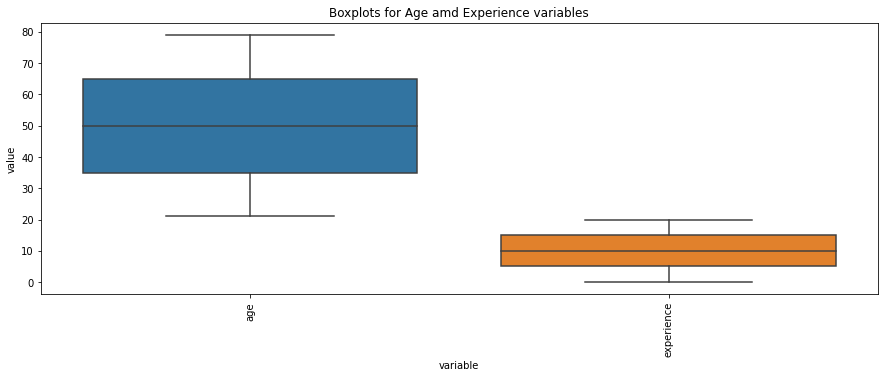

In [13]:
NewNumeric=df_train[['age', 'experience']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,5))
plt.title("Boxplots for Age amd Experience variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

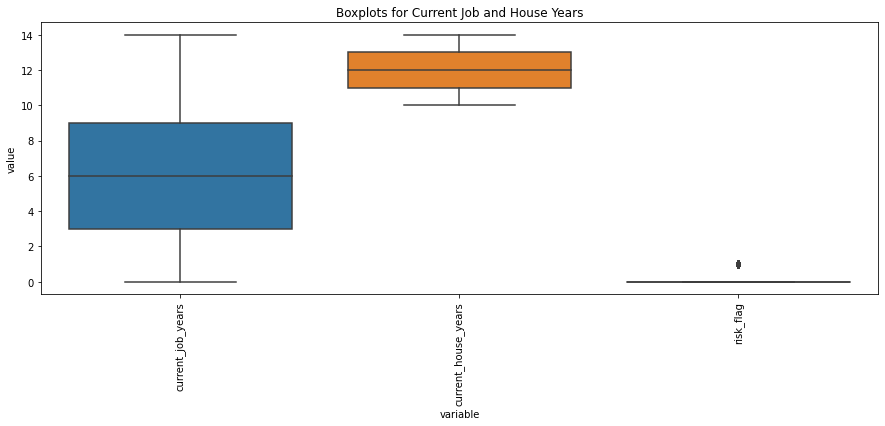

In [14]:
NewNumeric=df_train[['current_job_years',
       'current_house_years', 'risk_flag']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(15,5))
plt.title("Boxplots for Current Job and House Years")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

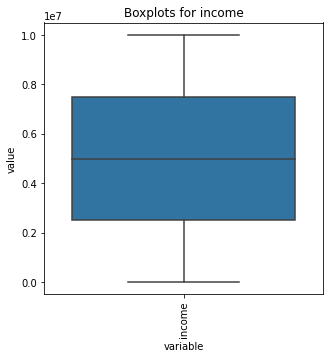

In [15]:
NewNumeric=df_train[['income']]
NewNumericMelt=NewNumeric.melt()
plt.figure(figsize=(5,5))
plt.title("Boxplots for income")
bp=sns.boxplot(x='variable',y='value',data=NewNumericMelt)
bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
plt.show()

**Bivariate Analysis of Numerical Columns**

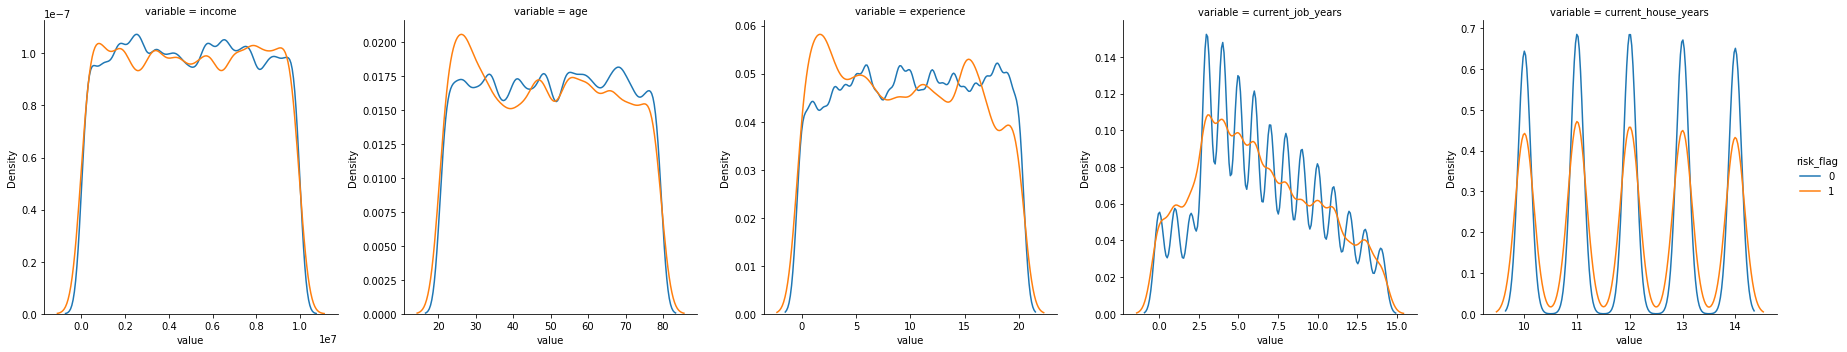

In [16]:
NumericBVData = NumericData.melt(id_vars=['risk_flag'])
NumericDataGD = sns.FacetGrid(NumericBVData, col='variable',sharex=False,sharey=False,dropna=True,height=5,col_wrap=5,  hue='risk_flag' )
histPlot=NumericDataGD.map(sns.kdeplot,'value' )
NumericDataGD.add_legend()
plt.show()

**Observations from Bivariate Analysis:**
1. It seems from figure 1 that Income does not much impact in identifying the credit risk defaulter.
2. People belonging to the age category 20-40 and 40-50 are more likely to be credit defaulters.
3. People who are less experienced that is below 4 years or between 12-17 years are more likely to be credit defaulters.
4. Current_house years do not play much important role in identifying the credit risk defaulters.

**Multivariate Analysis for Numerical Data**

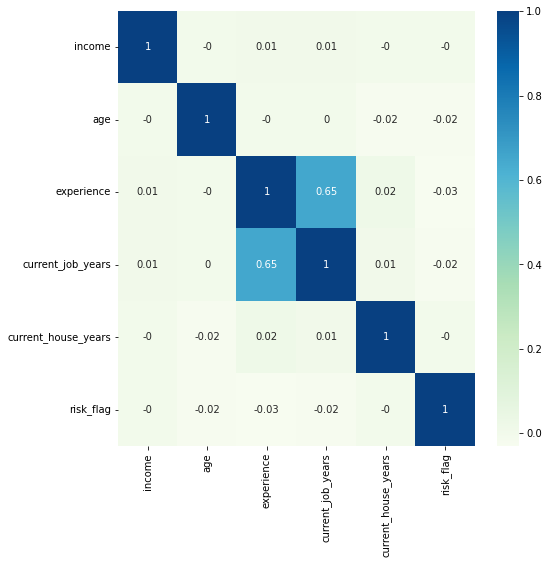

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(round(NumericData.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

**Univariate Analysis for Categorical Data**

In [18]:
#Separating Categorical data and checking the column names
CategoricalData=df_train.select_dtypes(include=['object'])
rows,col=(CategoricalData.shape)
print("Number of Category columns are:",col)
print(CategoricalData.columns)

Number of Category columns are: 6
Index(['married', 'house_ownership', 'car_ownership', 'profession', 'city',
       'state'],
      dtype='object')


In [23]:
#melting the dataframe to bring the data into single column
CategoricalDataMelt=CategoricalData.melt()
few_CategoricalData= df_train[['married', 'house_ownership', 'car_ownership','risk_flag']]
few_CategoricalDataMelt=few_CategoricalData.melt()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the countplot function without specifying `order` is likely to produce an incorrect plot.



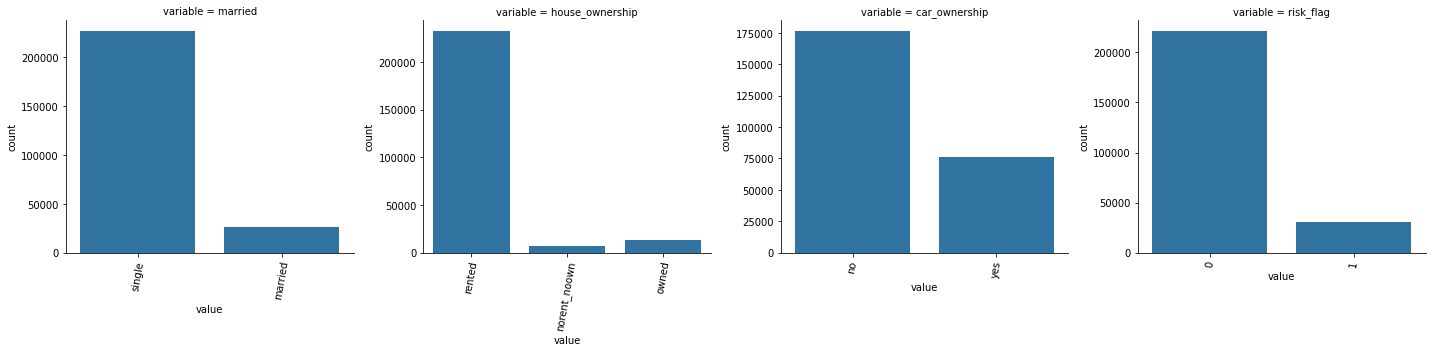

In [24]:
#Univariate Analysis for CountPlot for categorical variables
CatFacetGrid = sns.FacetGrid(few_CategoricalDataMelt, col='variable',sharex=False, 
                             dropna=True, sharey=False, height=5,col_wrap=4)
CatFacetGrid.set_xticklabels(rotation=80)
countPlot=CatFacetGrid.map(sns.countplot,'value')
countPlot.fig.tight_layout()

**Observation:**

From the above plot, below are the proportion of individuals who belongs to larger group
1. car_ownership : No
2. marriedl: Single
3. house_ownership: Rented

**Bivariate Analysis for Categorical Data**

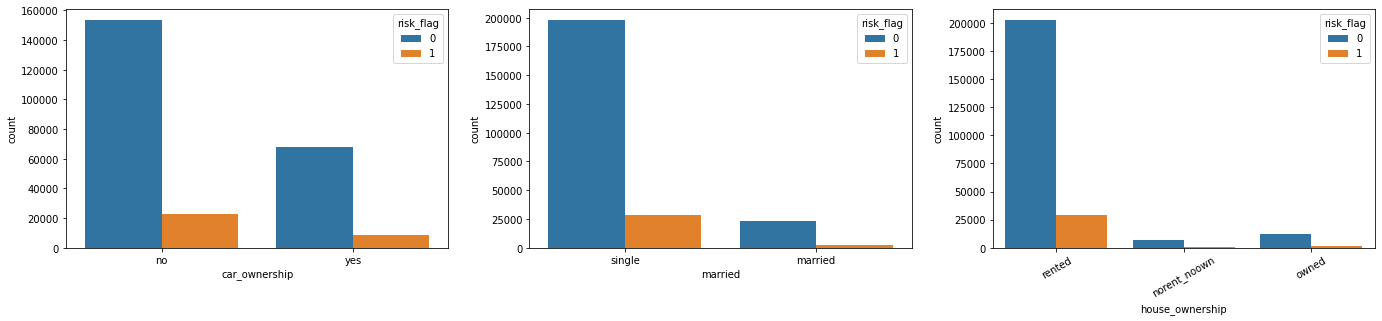

In [27]:
#Bivariate Analysis of categorical variables with Target column

#initialising plts
fig, axes = plt.subplots(nrows=1,ncols=3)

#Setting the size of the plot
fig.set_size_inches(20, 5)

#Adjusting the space between the subplots
fig. tight_layout(pad=5.0)

#setting the legend size in the plots
plt.legend(loc=2, prop={'size': 6})

#plotting the Bivariate analysis plots
a = sns.countplot(data=few_CategoricalData,x='car_ownership' ,
                orient = "v" , ax=axes[0],hue='risk_flag')
b = sns.countplot(data=few_CategoricalData,x='married' ,
                orient = "v" , ax=axes[1],hue='risk_flag')
c = sns.countplot(data=few_CategoricalData,x='house_ownership',
                orient = "v" , ax=axes[2],hue='risk_flag')

plt.xticks(rotation=30)
plt.show()

**Observations:**
More likely to be defaulter:
1. who do not own a car
2. single
3. living in rented house

**Converting Categorical Variables into Numerical Variables and Finding Correlation among all variables**

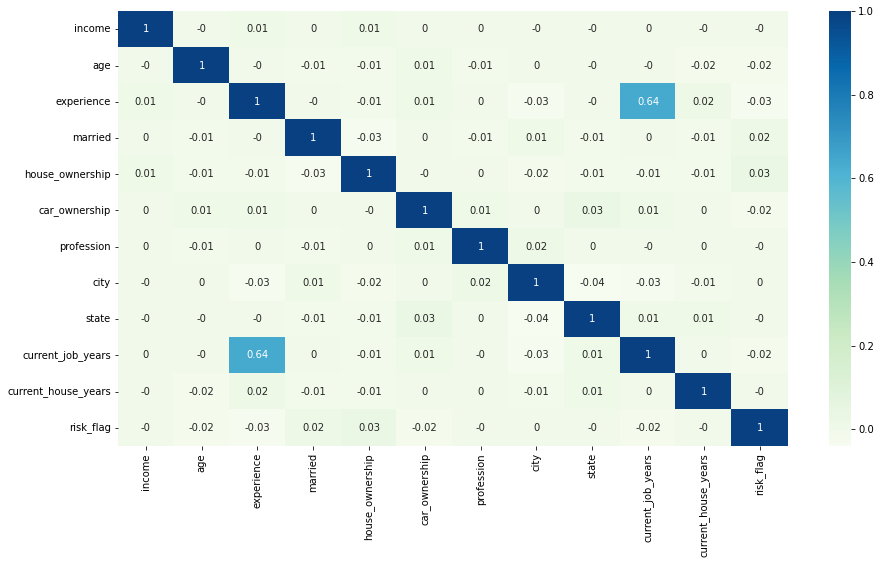

In [30]:
from sklearn.preprocessing import LabelEncoder
temp=df_train.copy()
le = LabelEncoder()
#Label encoding the categorical columns by converting them into string type
for feat in CategoricalData:
    temp[feat] = le.fit_transform(temp[feat].astype(str))

#plottting correlational plot checking Correlations
plt.figure(figsize=(15,8))
sns.heatmap(round(temp.corr(method='spearman'),2),annot=True,mask=None,cmap='GnBu')
plt.show()

In [32]:
#Removing unnecessary columns
temp.drop(columns=['income', 'profession', 'city', 'state', 'current_house_years'],inplace=True,axis=1)

# **Handling Data set Imbalance**

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [34]:
x = temp.drop(['risk_flag'] , axis = 1)
y = temp['risk_flag' ]

smt = SMOTE()
X_up, y_up = smt.fit_resample(x, y)

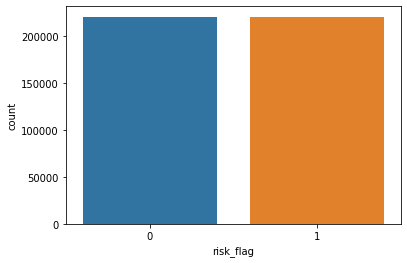

In [35]:
sns.countplot(data=temp, x = y_up)

In [36]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(y_up.value_counts())

Before Resampling :
0    221004
1     30996
Name: risk_flag, dtype: int64
After Resampling :
0    221004
1    221004
Name: risk_flag, dtype: int64


# **Data Preparation- Test and Train**

In [37]:
x_train , x_test , y_train , y_test = train_test_split(X_up,y_up , test_size= 0.2 , random_state=42)
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (353606, 6)
Shape of the y Train : (353606,)
Shape of the x Test : (88402, 6)
Shape of the y Test : (88402,)


# **Building Model**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix

# **Logistic Regression**

              precision    recall  f1-score   support

           0       0.55      0.51      0.53     44323
           1       0.54      0.58      0.56     44079

    accuracy                           0.54     88402
   macro avg       0.54      0.54      0.54     88402
weighted avg       0.54      0.54      0.54     88402



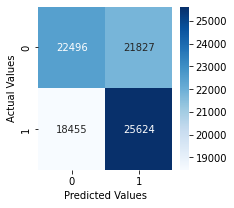

In [39]:
lr_mdl= LogisticRegression(solver='lbfgs',max_iter=10000)
lr_mdl1= lr_mdl.fit(x_train , y_train)

y_pred_lr_mdl1 = lr_mdl1.predict(x_test) 

cr_mdl1 = classification_report(y_test, y_pred_lr_mdl1)
print(cr_mdl1)

cm_mdl1 = confusion_matrix(y_test, y_pred_lr_mdl1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl1, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     44323
           1       0.81      0.93      0.87     44079

    accuracy                           0.86     88402
   macro avg       0.86      0.86      0.86     88402
weighted avg       0.86      0.86      0.86     88402



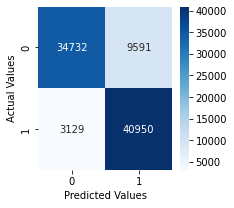

In [40]:
rf_mdl= RandomForestClassifier(max_depth=10000)
rf_mdl2= rf_mdl.fit(x_train , y_train)

y_pred_rf_mdl2 = rf_mdl2.predict(x_test) 

cr_rf_mdl2 = classification_report(y_test, y_pred_rf_mdl2)
print(cr_rf_mdl2)

cm_mdl2 = confusion_matrix(y_test, y_pred_rf_mdl2)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl2, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Decision Tree Classifier**

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     44323
           1       0.81      0.93      0.86     44079

    accuracy                           0.85     88402
   macro avg       0.86      0.85      0.85     88402
weighted avg       0.86      0.85      0.85     88402



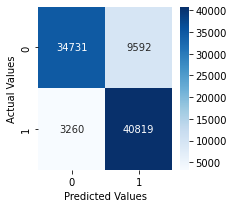

In [41]:
dt_mdl= DecisionTreeClassifier(class_weight='balanced',max_depth=10000)
dt_mdl3= dt_mdl.fit(x_train , y_train)

y_pred_dt_mdl3 = dt_mdl3.predict(x_test)

cr_dt_mdl3 = classification_report(y_test, y_pred_dt_mdl3)
print(cr_dt_mdl3)

cm_mdl3 = confusion_matrix(y_test, y_pred_dt_mdl3)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl3, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


# **XGBoost Classifier**

              precision    recall  f1-score   support

           0       0.59      0.58      0.59     44323
           1       0.59      0.60      0.59     44079

    accuracy                           0.59     88402
   macro avg       0.59      0.59      0.59     88402
weighted avg       0.59      0.59      0.59     88402



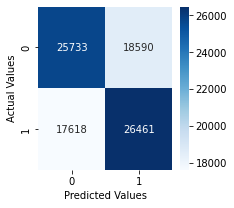

In [42]:
xg_mdl= xgboost.XGBClassifier()
xg_mdl4= xg_mdl.fit(x_train , y_train)

y_pred_xg_mdl4 = xg_mdl4.predict(x_test) 

cr_xg_mdl4 = classification_report(y_test, y_pred_xg_mdl4)
print(cr_xg_mdl4)

cm_mdl4 = confusion_matrix(y_test, y_pred_xg_mdl4)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl4, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Naive Bayes Classifier**

              precision    recall  f1-score   support

           0       0.56      0.37      0.44     44323
           1       0.53      0.71      0.60     44079

    accuracy                           0.54     88402
   macro avg       0.54      0.54      0.52     88402
weighted avg       0.54      0.54      0.52     88402



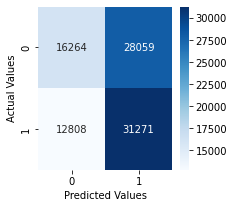

In [43]:
nb_mdl= GaussianNB()
nb_mdl5= nb_mdl.fit(x_train , y_train)

y_pred_nb_mdl5 = nb_mdl5.predict(x_test) 

cr_nb_mdl5 = classification_report(y_test, y_pred_nb_mdl5)
print(cr_nb_mdl5)

cm_mdl5 = confusion_matrix(y_test, y_pred_nb_mdl5)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl5, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Support Vector Machines**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



              precision    recall  f1-score   support

           0       1.00      0.00      0.00     44323
           1       0.50      1.00      0.67     44079

    accuracy                           0.50     88402
   macro avg       0.75      0.50      0.33     88402
weighted avg       0.75      0.50      0.33     88402



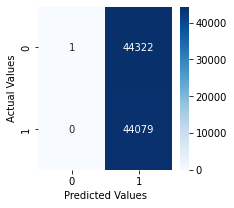

In [44]:
from sklearn import svm
svm_mdl=svm.LinearSVC()
svm_mdl6=svm_mdl.fit(x_train, y_train)

y_pred_svm_mdl6 = svm_mdl6.predict(x_test) 

cr_svm_mdl6 = classification_report(y_test, y_pred_svm_mdl6)
print(cr_svm_mdl6)

cm_mdl6 = confusion_matrix(y_test, y_pred_svm_mdl6)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl6, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()